In [2]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')

from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [3]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [4]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [5]:
b = baby('FMC003')

Time spent to generate the plot: 0:02:18.462058


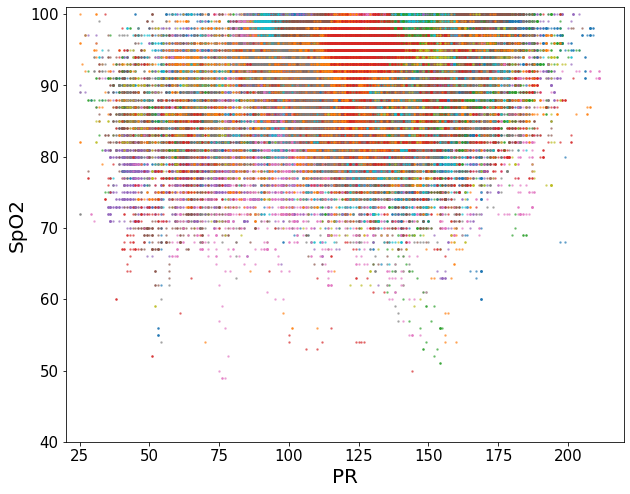

In [56]:
startTime = datetime.now()
fig = plt.figure(0,figsize=(10,8))
ids = np.unique(T['BABY_IDS'])
for b_id in ids:
    b = baby(b_id)
    for m in range(len(b.files)):
        pr = b.measurements[m]['PR']
        spo2 = b.measurements[m]['SpO2']
        plt.plot(pr,spo2,".",alpha=0.5,markersize=3)
plt.xlabel('PR')
plt.ylabel('SpO2')
plt.xlim(20,220)
plt.ylim(40,101)
#plt.show()
print('Time spent to generate the plot:',datetime.now() - startTime)

# generate long array containing all the data

In [6]:
np.full(10,13)

array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

In [67]:
np.array(list(map(float,np.array(['1','2','3','4','5']))))

array([1., 2., 3., 4., 5.])

In [68]:
np.array(map(float,np.array(['1','2','3','4','5'])))

array(<map object at 0x7f8a7f64bf28>, dtype=object)

In [75]:
#startTime = datetime.now()
############################
#PR_TOT = np.array([])
#SPO2_TOT = np.array([])
#ids = np.unique(T['BABY_IDS'])
#for b_id in ids:
#    b = baby(b_id)
#    for m in range(len(b.files)):
#        pr = b.measurements[m]['PR']
#        spo2 = b.measurements[m]['SpO2']
#        PR_TOT   = np.concatenate((PR_TOT, pr), axis=None)
#        SPO2_TOT = np.concatenate((SPO2_TOT, spo2), axis=None)
#print('Time spent to crate arrays:',datetime.now() - startTime)

Time spent to crate arrays: 0:02:12.529313


In [69]:
startTime = datetime.now()
###########################
PR_TOT = np.array([])
SPO2_TOT = np.array([])
PI_TOT = np.array([])
MED_PR_TOT = np.array([])
MED_SPO2_TOT = np.array([])
MED_PI_TOT = np.array([])

count = 0

ids = np.unique(T['BABY_IDS'])
for b_id in ids:
    count = count + 1
    #print(count/len(ids))
    print('Percentage of babies scanned: [%.2f%%]\r'%(count/len(ids)*100), end="")
    b = baby(b_id)
    for m in range(len(b.files)):
        # This would generate array with different sizes
        #pr = b.measurements_pr_clean[m]
        #spo2 = b.measurements_spo2_clean[m]
        
        try:
            pr = b.measurements[m]['PR']
            spo2 = b.measurements[m]['SpO2']
            pi = np.array(list(map(float,b.measurements[m]['PI'])))
        
            med_pr = np.full(len(pr),b.measurements_PR_median[m])
            med_spo2 = np.full(len(spo2),b.measurements_SpO2_median[m])
            med_pi = np.full(len(pi),b.measurements_PI_median[m])
            
            MED_PR_TOT   = np.concatenate((MED_PR_TOT, med_pr), axis=None)
            MED_SPO2_TOT = np.concatenate((MED_SPO2_TOT, med_spo2), axis=None)
            MED_PI_TOT   = np.concatenate((MED_PI_TOT, med_pi), axis=None)
            
            PR_TOT   = np.concatenate((PR_TOT, pr), axis=None)
            SPO2_TOT = np.concatenate((SPO2_TOT, spo2), axis=None)
            PI_TOT = np.concatenate((PI_TOT, pi), axis=None,)

        except:
            # this way, if I don't have the pi, I skip pr and spo2 as well
            pass
                                        
print('Time spent to crate arrays:',datetime.now() - startTime)


Time spent to crate arrays: 0:02:09.545749


In [72]:
for i in range(len(PI_TOT)):
    if type(PI_TOT[i])==str:
        print(PI_TOT[i])

# Create txt file

In [71]:
# Create txt file with all the 2-seconds spaced data-points
#mat = np.array([PR_TOT,SPO2_TOT,MED_PR_TOT,MED_SPO2_TOT])
mat = np.array([PR_TOT,SPO2_TOT,PI_TOT, MED_PR_TOT,MED_SPO2_TOT,MED_PI_TOT])
#np.savetxt("../TOST_data/total_datapoints_pi.txt",mat.T,fmt='%.3f',header='PR SPO2 MED_PR MED_SPO2')
np.savetxt("../TOST_data/total_datapoints_pi.txt",mat.T,fmt='%.3f',header='PR SPO2 PI MED_PR MED_SPO2 MED_PI')

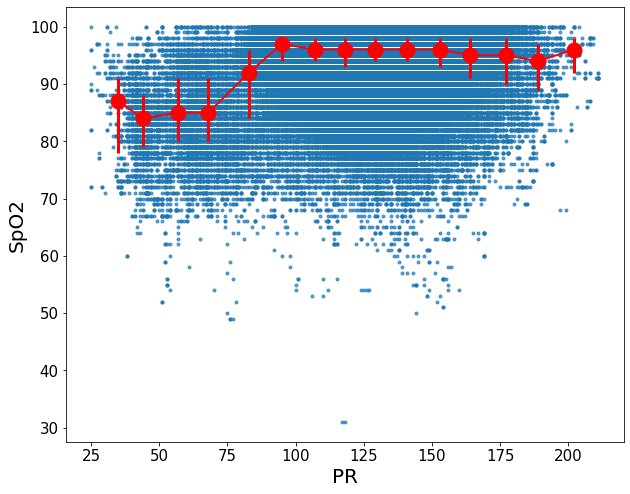

In [14]:
plt.figure(figsize=(10,8))
sel = np.where((PR_TOT>10.)&(SPO2_TOT>10.))
plt.plot(PR_TOT[sel],SPO2_TOT[sel],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[sel],SPO2_TOT[sel],25,210,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(75,100)

plt.xlabel('PR')
plt.ylabel('SpO2')
plt.show()

In [17]:
help(abs)

Help on built-in function abs in module builtins:

abs(x, /)
    Return the absolute value of the argument.



In [74]:
good_val = np.where(((PR_TOT>10.)&(SPO2_TOT>10)&(PI_TOT>0.000001)&(PI_TOT<100)))

In [75]:
DELTA_PR = PR_TOT- MED_PR_TOT

In [76]:
DELTA_SPO2 = SPO2_TOT - MED_SPO2_TOT

In [77]:
DELTA_PI = PI_TOT - MED_PI_TOT

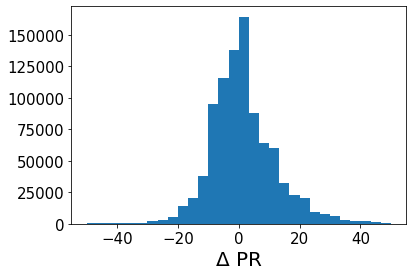

In [78]:
plt.hist(DELTA_PR[good_val],bins=30,range=(-50,50))
plt.xlabel(r'$\Delta$ PR')
plt.show()

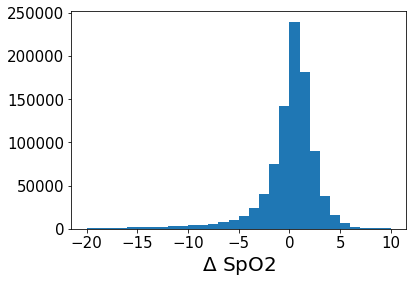

In [79]:
plt.hist(DELTA_SPO2[good_val],bins=30,range=(-20,10))
plt.xlabel(r'$\Delta$ SpO2')
plt.show()

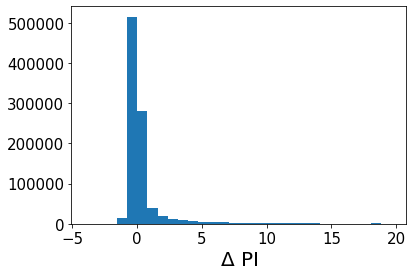

In [81]:
plt.hist(DELTA_PI[good_val],bins=30)#,range=(-20,10))
plt.xlabel(r'$\Delta$ PI')
plt.show()

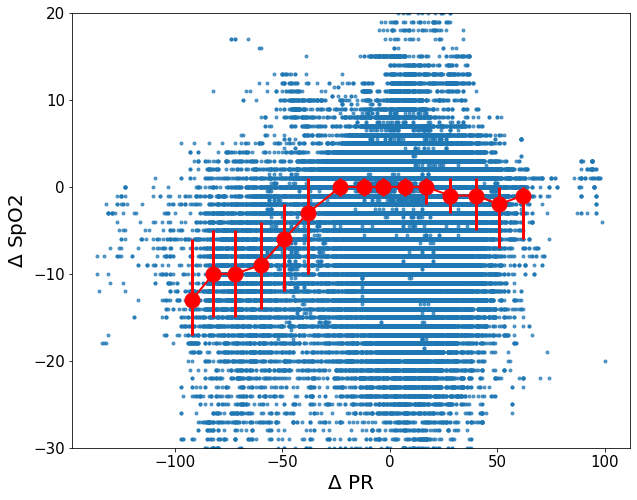

In [46]:
plt.figure(figsize=(10,8))
sel = np.where((PR_TOT>10.)&(SPO2_TOT>10.))
plt.plot(DELTA_PR[sel],DELTA_SPO2[sel],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(DELTA_PR[sel],DELTA_SPO2[sel],-100,70,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

plt.ylim(-30,20)

plt.xlabel(r'$\Delta$ PR')
plt.ylabel(r'$\Delta$ SpO2')
plt.show()

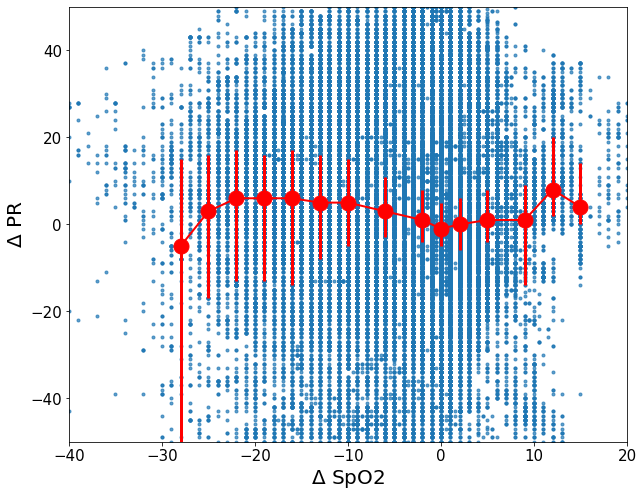

In [48]:
plt.figure(figsize=(10,8))
sel = np.where((PR_TOT>10.)&(SPO2_TOT>10.))
plt.plot(DELTA_SPO2[sel],DELTA_PR[sel],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(DELTA_SPO2[sel],DELTA_PR[sel],-30,17,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

plt.xlim(-40,20)
plt.ylim(-50,50)

plt.xlabel(r'$\Delta$ SpO2')
plt.ylabel(r'$\Delta$ PR')

plt.show()

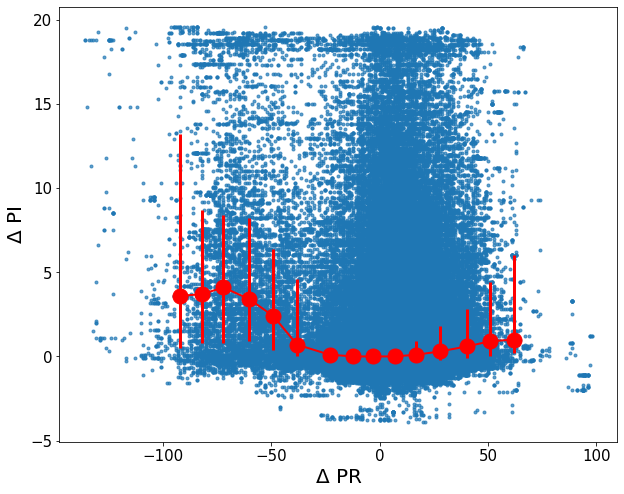

In [83]:
plt.figure(figsize=(10,8))

plt.plot(DELTA_PR[good_val],DELTA_PI[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(DELTA_PR[good_val],DELTA_PI[good_val],-100,70,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'$\Delta$ PR')
plt.ylabel(r'$\Delta$ PI')
plt.show()

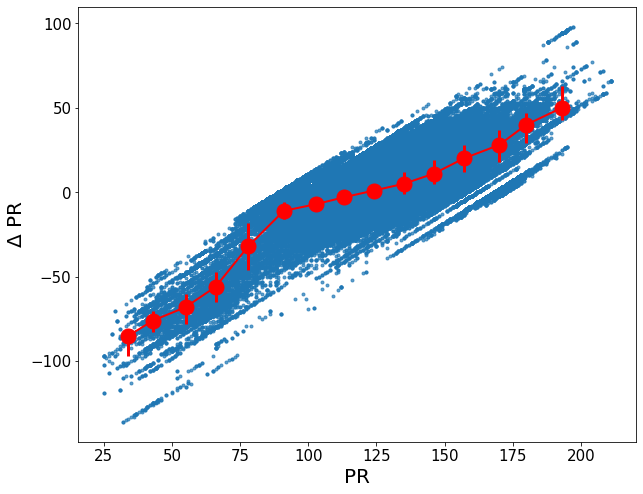

In [88]:
plt.figure(figsize=(10,8))

plt.plot(PR_TOT[good_val],DELTA_PR[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[good_val],DELTA_PR[good_val],25,200,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'PR')
plt.ylabel(r'$\Delta$ PR')
plt.show()

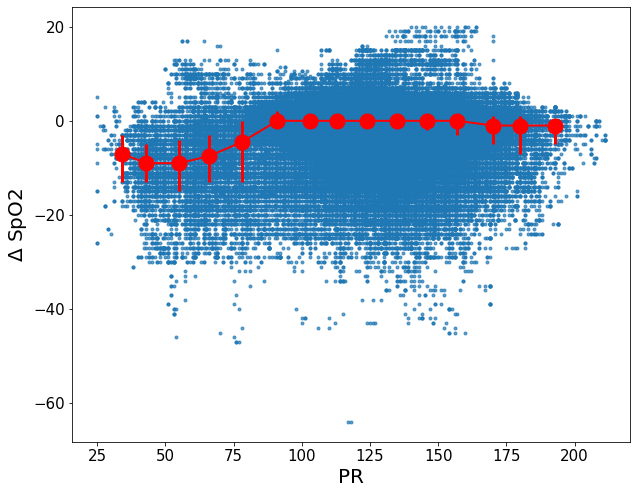

In [90]:
plt.figure(figsize=(10,8))

plt.plot(PR_TOT[good_val],DELTA_SPO2[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[good_val],DELTA_SPO2[good_val],25,200,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'PR')
plt.ylabel(r'$\Delta$ SpO2')
plt.show()

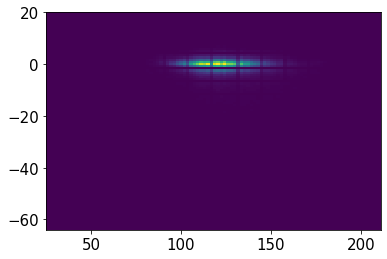

In [96]:
plt.hist2d(PR_TOT[good_val],DELTA_SPO2[good_val],bins=100)
plt.show()

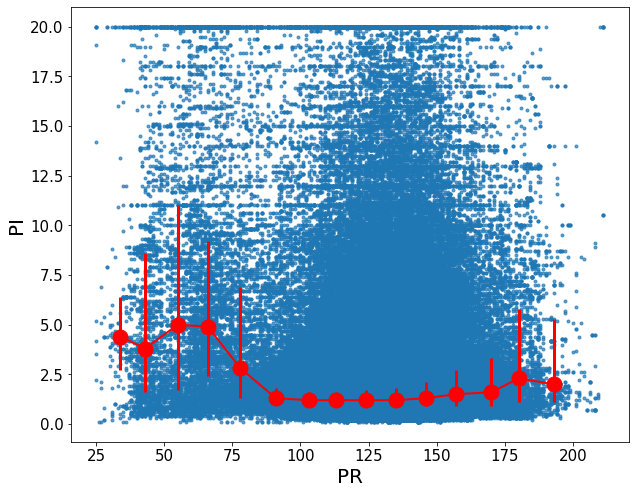

In [98]:
plt.figure(figsize=(10,8))

plt.plot(PR_TOT[good_val],PI_TOT[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[good_val],PI_TOT[good_val],25,200,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'PR')
plt.ylabel(r'PI')
plt.show()

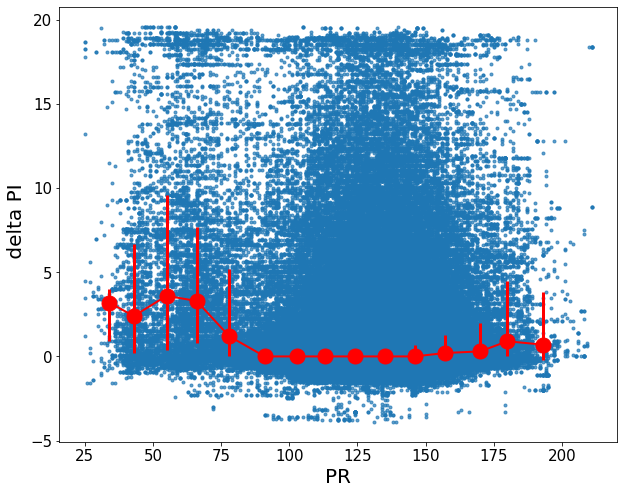

In [105]:
plt.figure(figsize=(10,8))

plt.plot(PR_TOT[good_val],DELTA_PI[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[good_val],DELTA_PI[good_val],25,200,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'PR')
plt.ylabel(r' delta PI')
plt.show()

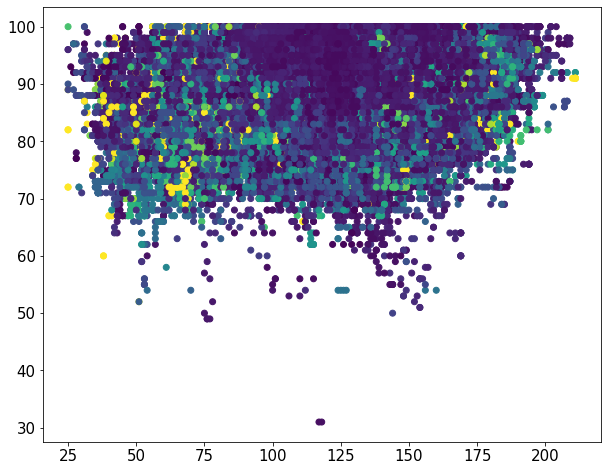

In [102]:
plt.figure(figsize=(10,8))
plt.scatter(PR_TOT[good_val],SPO2_TOT[good_val],c=PI_TOT[good_val])
plt.show()

In [95]:
len(PR_TOT[sel])

992678

In [96]:
len(SPO2_TOT[sel])

992678

In [97]:
len(PR_TOT[sel])/len(PR_TOT)

0.9762755937494161

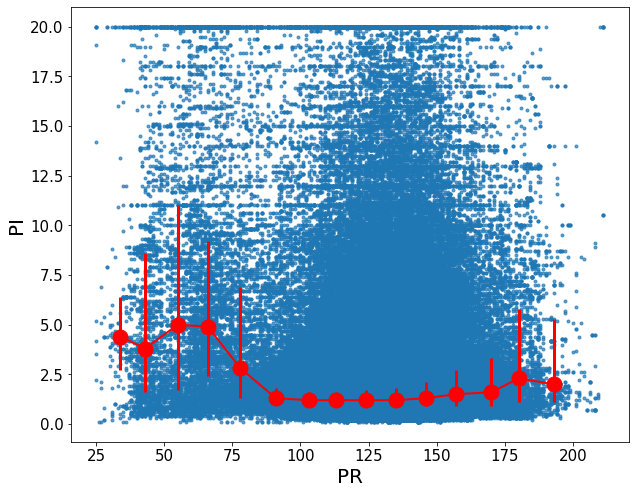

In [104]:
plt.figure(figsize=(10,8))

plt.plot(PR_TOT[good_val],PI_TOT[good_val],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[good_val],PI_TOT[good_val],25,200,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(-30,20)

plt.xlabel(r'PR')
plt.ylabel(r'PI')
plt.show()